<a href="https://colab.research.google.com/github/jasminejj08/Data-Science-Analyses/blob/main/DataScience_SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Support Vector Machine (SVM)

In [ ]:
#Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Automating the file reading process for the dataset about Polsar Stars
#Saving the dataset as a dataframe with the name stars_df
url = 'https://raw.githubusercontent.com/alexandrehsd/Predicting-Pulsar-Stars/master/pulsar_stars.csv'
stars_df = pd.read_csv(url, na_values="?")

In [ ]:
#Displaying the dataframe structure and top rows of the dataset
stars_df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
#Renaming the column names to reduce length and remove spaces
stars_df.columns = ['integrated_mean', 'integrated_std', 'integrated_ekurtosis', 'integrated_skew',
                         'dmsnr_mean', 'dmsnr_std', 'dmsnr_ekurtosiss', 'dmsnr_skew',
                         'target_class']

In [ ]:
#Displaying the dataframe structure and top rows of dataset after renaming columns
stars_df.head()

,integrated_mean,integrated_std,integrated_ekurtosis,integrated_skew,dmsnr_mean,dmsnr_std,dmsnr_ekurtosiss,dmsnr_skew,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [ ]:
stars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   integrated_mean       17898 non-null  float64
 1   integrated_std        17898 non-null  float64
 2   integrated_ekurtosis  17898 non-null  float64
 3   integrated_skew       17898 non-null  float64
 4   dmsnr_mean            17898 non-null  float64
 5   dmsnr_std             17898 non-null  float64
 6   dmsnr_ekurtosiss      17898 non-null  float64
 7   dmsnr_skew            17898 non-null  float64
 8   target_class          17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [ ]:
#Checking for NA/NULL values and removing those rows
print(stars_df.isna().sum())
stars_df = stars_df.dropna()

integrated_mean         0
integrated_std          0
integrated_ekurtosis    0
integrated_skew         0
dmsnr_mean              0
dmsnr_std               0
dmsnr_ekurtosiss        0
dmsnr_skew              0
target_class            0
dtype: int64


In [ ]:
stars_df.isna().sum()

integrated_mean         0
integrated_std          0
integrated_ekurtosis    0
integrated_skew         0
dmsnr_mean              0
dmsnr_std               0
dmsnr_ekurtosiss        0
dmsnr_skew              0
target_class            0
dtype: int64

In [ ]:
#Display class distribution
stars_df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

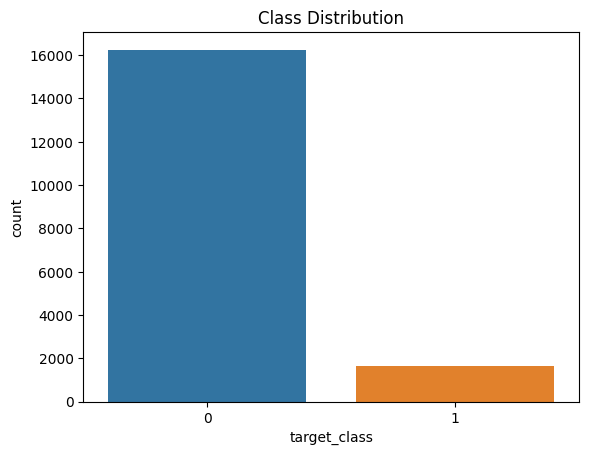

In [ ]:
#Checking the data distributions
ax = sns.countplot(x='target_class', data=stars_df).set(title='Class Distribution')

In [ ]:
#There are much more observations of the target class 0 in comparison
#to the target class 1. There is an imbalance in the classes.

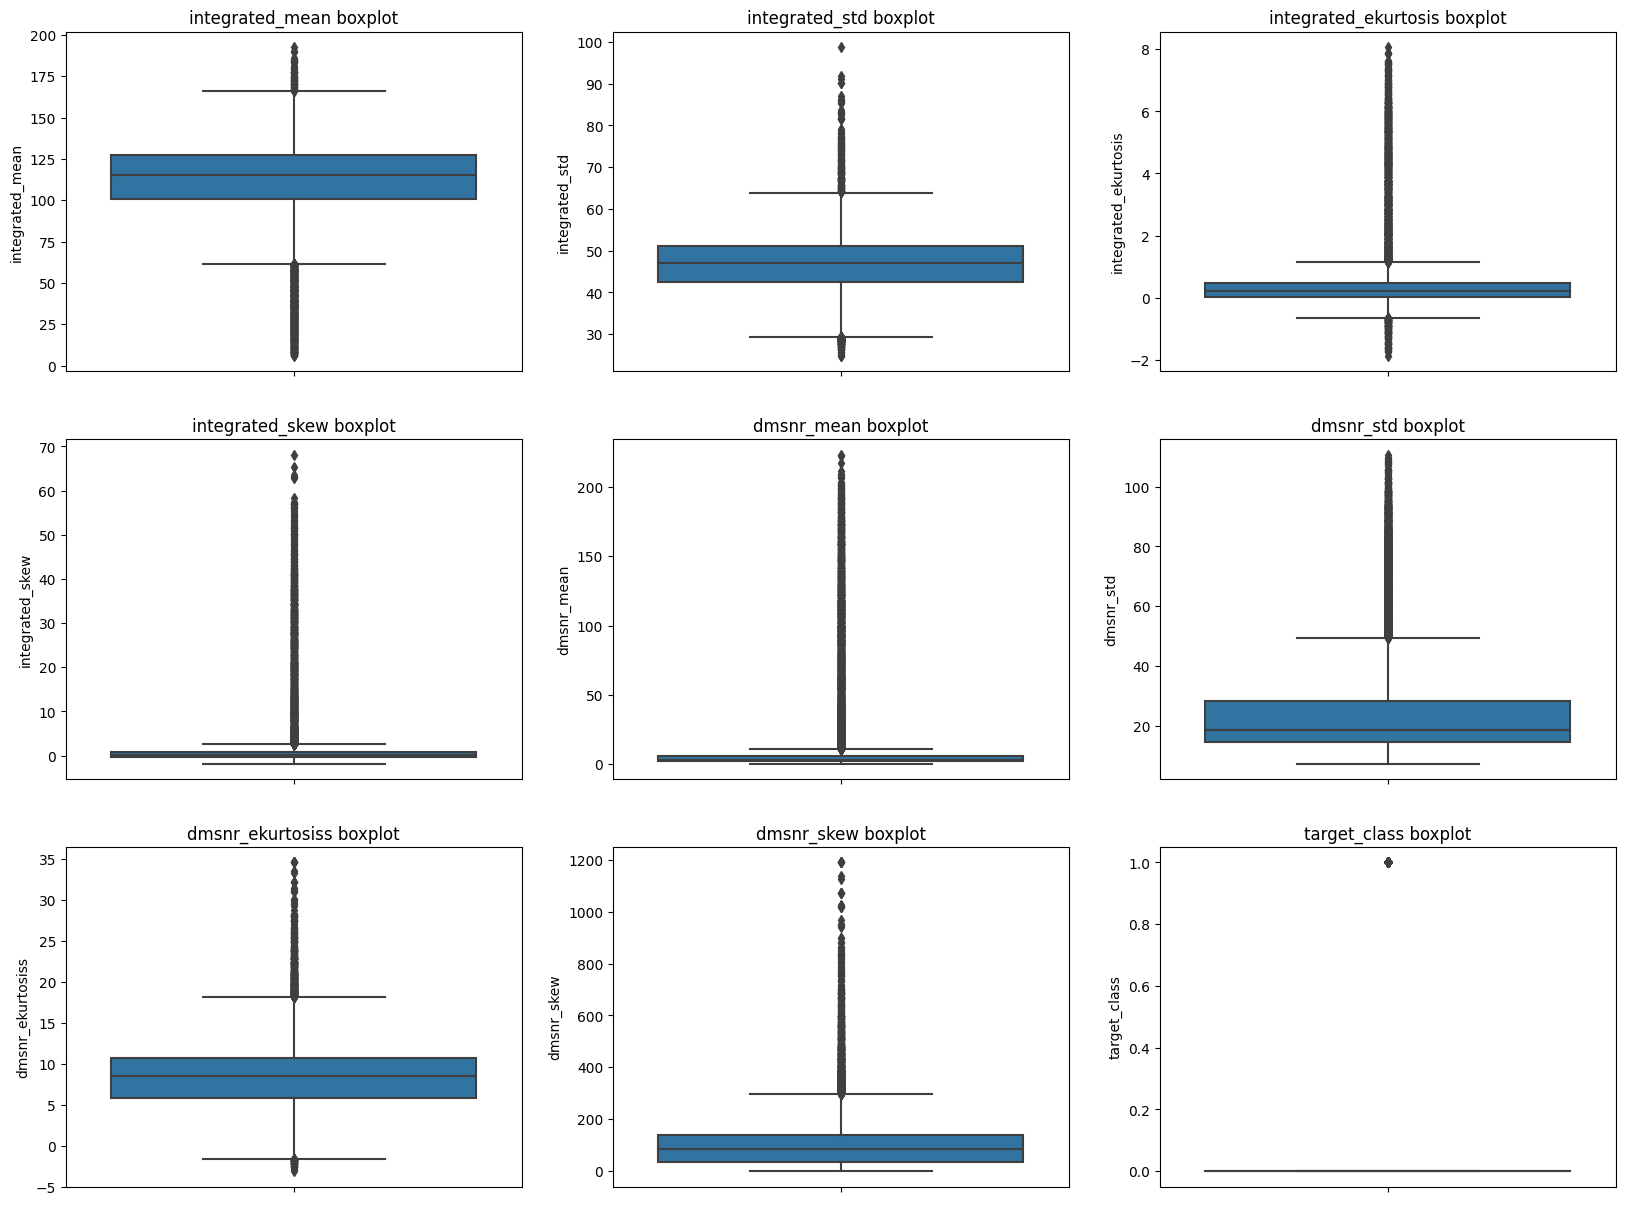

In [ ]:
#Plot outliers for numerical columns. Use boxplot and display three graphs per line
numeric_cols = ['integrated_mean', 'integrated_std', 'integrated_ekurtosis', 'integrated_skew',
                         'dmsnr_mean', 'dmsnr_std', 'dmsnr_ekurtosiss', 'dmsnr_skew',
                         'target_class']

graphs_per_row = 3
num_rows = int(np.ceil(len(numeric_cols) / graphs_per_row))

fig, axs = plt.subplots(num_rows, 3, figsize=(20,15))
for i, col in enumerate(numeric_cols):
  sns.boxplot(y=stars_df[col], ax=axs[i//3, i%3])
  axs[i//3, i%3].set_title(col + " boxplot")

plt.show()

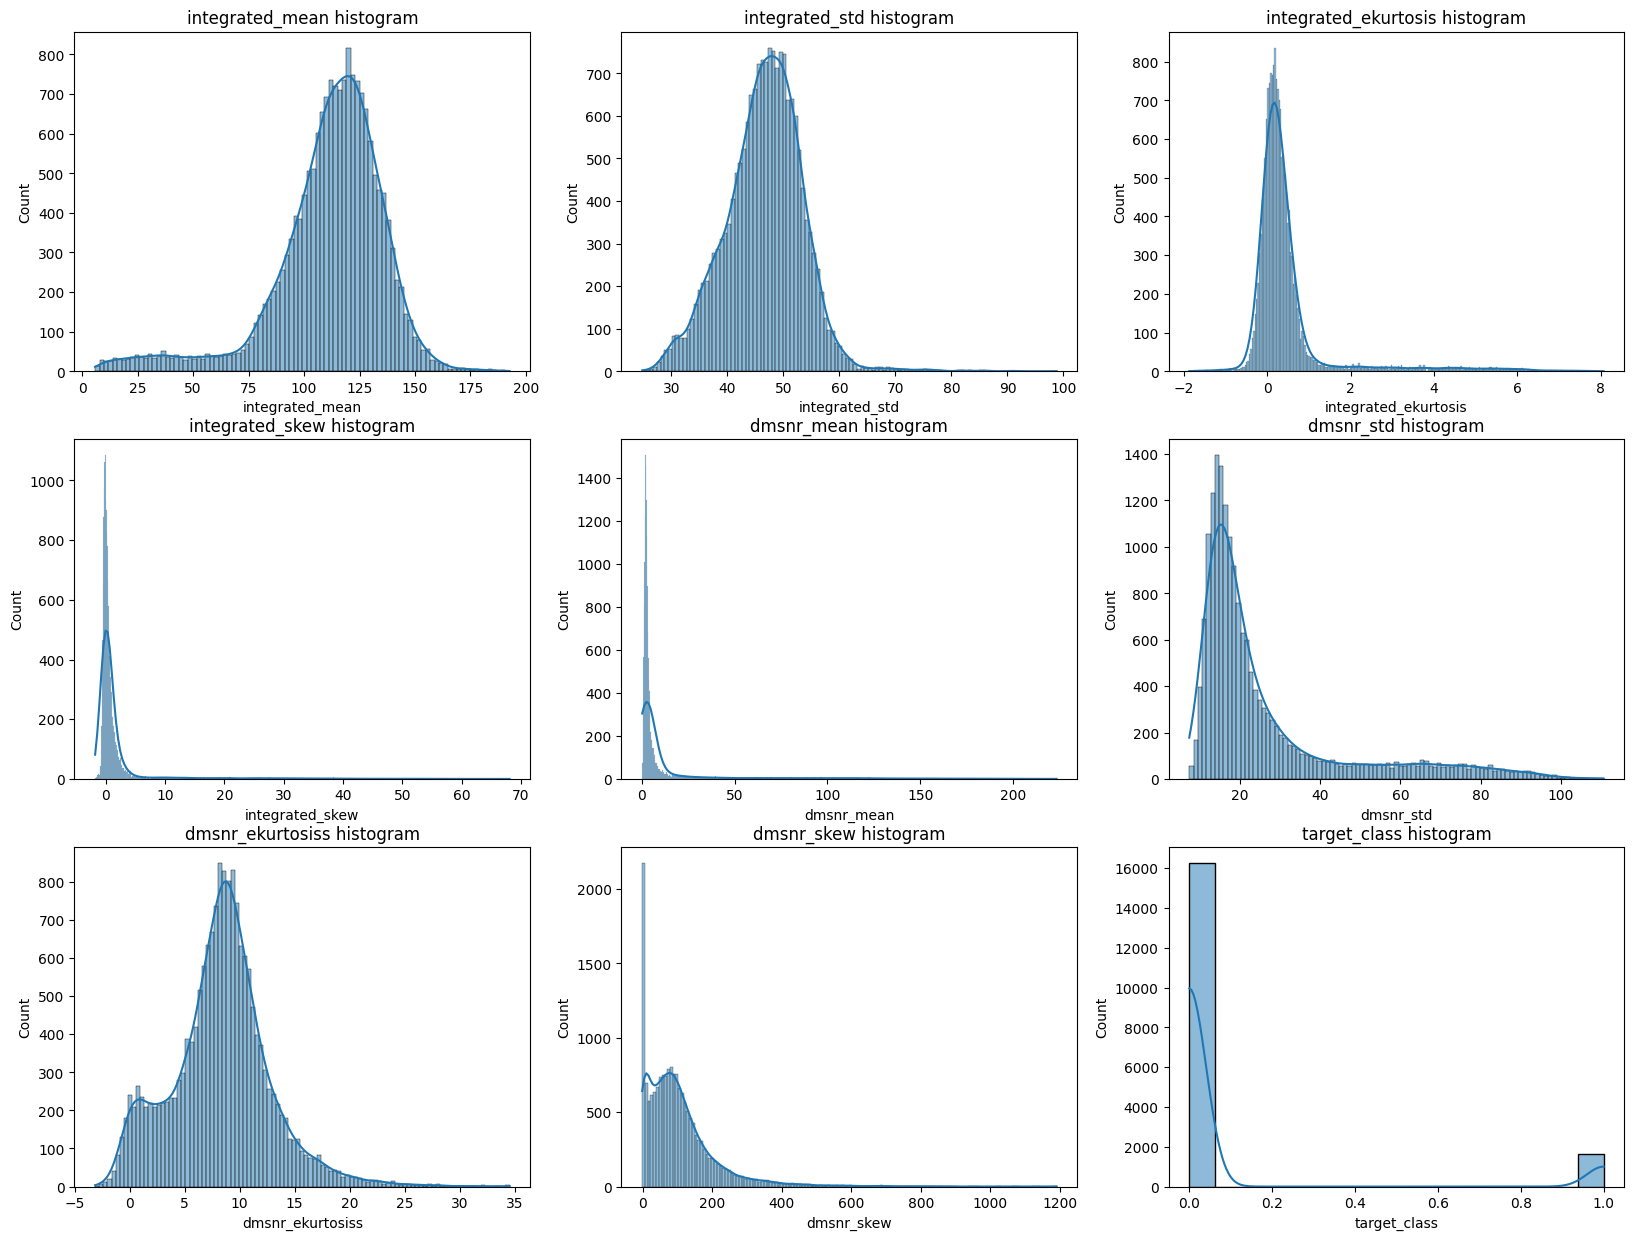

In [ ]:
#Plot histograms for the same variables, display 3 graphs per line
fig, axs = plt.subplots(num_rows, 3, figsize=(20,15))
for i, col in enumerate(numeric_cols):
  sns.histplot(x=stars_df[col], ax=axs[i//3, i%3], kde=True)
  axs[i//3, i%3].set_title(col + " histogram")

plt.show()

In [ ]:
#Generating SVM Classes

#Split the data into 80% training and 20% testing
X = stars_df.drop(['target_class'], axis=1)
y = stars_df['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Apply standardization techniques to normalize the data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Q: WHAT ARE THE DIFFERENT KERNALS USED IN SVM?

#SVM (Support Vector Machine) is a classification algorithm that
#produces a decision boundary (a line) between data points on
#a curve to help identify a new data point as one of two classes
#This boundary line maximizes the distance to the neareset element
#of each class.

#Kernal functions are used to map nonliner observations into higher-dimensional
#space which makes those observations seperable. There are different
#kinds of kernal functions used in SVM including:

#1) Linear Kernel --> this method uses the dot product of the two vectors;
#most basic type of kernel; usually one dimensional in nature

#2) Polynomial Kernel --> often used when the data is not linearly seperable;
#a generalized form of linear kernel method

#3) Gaussian Radial Basis Function (RBF) --> for non-linear data and when
#no prior knowledge of data

#4) Sigmoid Kernel --> usually used for neural networks

#And more...

In [ ]:
#Q: WHICH KERNEL IS THE DEFAULT ONE?

#The default kernel in SVM is RBF (Guassian Radial Basis).

In [ ]:
#Generate classification model using SVM (using default hyperparameters)
#and display accuracy
#Q: WHAT KERNEL IS USED FOR THE DEFAULT SETTING? --> Gaussian Radial Basis (RBF)

#create instance of SVC
svc = SVC()

#fit to the training set
svc.fit(X_train, y_train)

#predict the target class
y_pred = svc.predict(X_test)

#determine the accruacy
accuracy = accuracy_score(y_test, y_pred)
print("SVC Model accuracy with default hyperparameters (RBF): ", accuracy)


SVC Model accuracy with default hyperparameters (RBF):  0.9826815642458101


In [ ]:
#Use the regularization parameter to control the outliers (1.0, 100.0, 1000.0)
#and display the classification report for each value

c_values = [1.0, 100.0, 1000.0]

for c in c_values:
  svmc = SVC(C=c)
  svmc.fit(X_train, y_train)
  y_predc = svmc.predict(X_test)
  accuracyc = accuracy_score(y_test, y_predc)
  reportc = classification_report(y_test, y_predc, digits=4)
  print("Accuracy with the regularization value = ", c, " : ", accuracyc)
  print("Classification report for regularization value = ", c, " : ", reportc)

Accuracy with the regularization value =  1.0  :  0.9826815642458101
Classification report for regularization value =  1.0  :                precision    recall  f1-score   support

           0     0.9871    0.9943    0.9907      3306
           1     0.9240    0.8431    0.8817       274

    accuracy                         0.9827      3580
   macro avg     0.9555    0.9187    0.9362      3580
weighted avg     0.9823    0.9827    0.9823      3580

Accuracy with the regularization value =  100.0  :  0.9832402234636871
Classification report for regularization value =  100.0  :                precision    recall  f1-score   support

           0     0.9883    0.9936    0.9910      3306
           1     0.9180    0.8577    0.8868       274

    accuracy                         0.9832      3580
   macro avg     0.9531    0.9257    0.9389      3580
weighted avg     0.9829    0.9832    0.9830      3580

Accuracy with the regularization value =  1000.0  :  0.9815642458100559
Classification r

In [ ]:
#Generate the classificatioon model using SVM (using linear kernel)
#and display the accuracy

#create an instance SVC with linear kernel
linearsvm = SVC(kernel='linear')

#train the data
linearsvm.fit(X_train, y_train)

#make prediction for target class
ypred_linear = linearsvm.predict(X_test)

#calculate accuracy
linear_accuracy = accuracy_score(y_test, ypred_linear)

#print the accuracy for the linear svm model
print("Accuracy for SVM model with linear kernel: ", linear_accuracy)

Accuracy for SVM model with linear kernel:  0.9829608938547486


In [ ]:
#Use the regularization parameter to control the outliers (1.0, 100.0, 1000.0)
#and display the classifcation report for each value for the linear kernel

c_values = [1.0, 100.0, 1000.0]

for c in c_values:
  svm_linear = SVC(C=c, kernel='linear')
  svm_linear.fit(X_train, y_train)
  ypred_linear = svm_linear.predict(X_test)
  accuracy_linear = accuracy_score(y_test, ypred_linear)
  report_linear = classification_report(y_test, ypred_linear, digits=4)
  print("Accuracy with the for Linear kernel value = ", c, " : ", accuracy_linear)
  print("Classification report for Linear kernel with value = ", c, " : ", report_linear)

Accuracy with the for Linear kernel value =  1.0  :  0.9829608938547486
Classification report for Linear kernel with value =  1.0  :                precision    recall  f1-score   support

           0     0.9868    0.9949    0.9908      3306
           1     0.9312    0.8394    0.8829       274

    accuracy                         0.9830      3580
   macro avg     0.9590    0.9171    0.9369      3580
weighted avg     0.9825    0.9830    0.9826      3580

Accuracy with the for Linear kernel value =  100.0  :  0.9832402234636871
Classification report for Linear kernel with value =  100.0  :                precision    recall  f1-score   support

           0     0.9871    0.9949    0.9910      3306
           1     0.9315    0.8431    0.8851       274

    accuracy                         0.9832      3580
   macro avg     0.9593    0.9190    0.9380      3580
weighted avg     0.9828    0.9832    0.9829      3580

Accuracy with the for Linear kernel value =  1000.0  :  0.9832402234636871